In [1]:
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('GlaucomaM.csv')

In [3]:
print(df.shape)
df.head()

(196, 63)


,ag,at,as,an,ai,eag,eat,eas,ean,eai,...,tmt,tms,tmn,tmi,mr,rnf,mdic,emd,mv,Class
0,2.220,0.354,0.580,0.686,0.601,1.267,0.336,0.346,0.255,0.331,...,-0.018,-0.230,-0.510,-0.158,0.841,0.410,0.137,0.239,0.035,normal
1,2.681,0.475,0.672,0.868,0.667,2.053,0.440,0.520,0.639,0.454,...,-0.014,-0.165,-0.317,-0.192,0.924,0.256,0.252,0.329,0.022,normal
2,1.979,0.343,0.508,0.624,0.504,1.200,0.299,0.396,0.259,0.246,...,-0.097,-0.235,-0.337,-0.020,0.795,0.378,0.152,0.250,0.029,normal
3,1.747,0.269,0.476,0.525,0.476,0.612,0.147,0.017,0.044,0.405,...,-0.035,-0.449,-0.217,-0.091,0.746,0.200,0.027,0.078,0.023,normal
4,2.990,0.599,0.686,1.039,0.667,2.513,0.543,0.607,0.871,0.492,...,-0.105,0.084,-0.012,-0.054,0.977,0.193,0.297,0.354,0.034,normal


In [4]:
class_dict = {'normal':0,'glaucoma':1}

In [5]:
df.Class = df.Class.map(lambda x: class_dict[x])

In [6]:
X = df.drop('Class',axis=1)
y = df.Class

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=14)

In [8]:
y_train.value_counts()

1    76
0    71
Name: Class, dtype: int64

In [9]:
from imblearn.datasets import make_imbalance

Using TensorFlow backend.


In [10]:
X_train, y_train = make_imbalance(X_train,y_train, sampling_strategy = {0:71,1:71})

In [11]:
report_dict = {'rf':[],'dt':[],'xgb':[],'sgd':[],'logreg':[],'lsvc':[],'svm':[],'gnb':[],'knn':[]}

              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       1.00      0.77      0.87        22

    accuracy                           0.90        49
   macro avg       0.92      0.89      0.89        49
weighted avg       0.91      0.90      0.90        49



<Figure size 432x288 with 0 Axes>

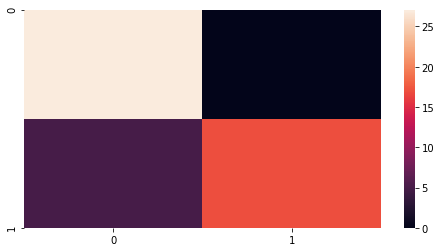

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
Y_pred = rf.predict(X_test)
print(classification_report(y_test,Y_pred))
plt.tight_layout()
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,Y_pred))
report_dict['rf'].append((round(accuracy_score(y_test,Y_pred),3),round(precision_score(y_test,Y_pred),3),
round(recall_score(y_test,Y_pred),3),round(f1_score(y_test,Y_pred),3)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.90      0.82      0.86        22

    accuracy                           0.88        49
   macro avg       0.88      0.87      0.88        49
weighted avg       0.88      0.88      0.88        49



<Figure size 432x288 with 0 Axes>

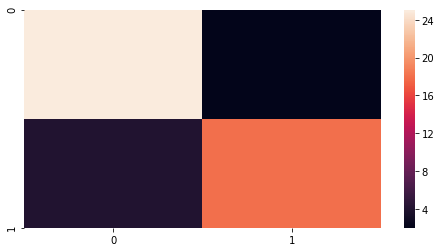

In [13]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
Y_pred = xgb.predict(X_test)
print(classification_report(y_test,Y_pred))
plt.tight_layout()
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,Y_pred))
report_dict['xgb'].append((round(accuracy_score(y_test,Y_pred),3),round(precision_score(y_test,Y_pred),3),
round(recall_score(y_test,Y_pred),3),round(f1_score(y_test,Y_pred),3)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.85      0.77      0.81        22

    accuracy                           0.84        49
   macro avg       0.84      0.83      0.83        49
weighted avg       0.84      0.84      0.84        49



<Figure size 432x288 with 0 Axes>

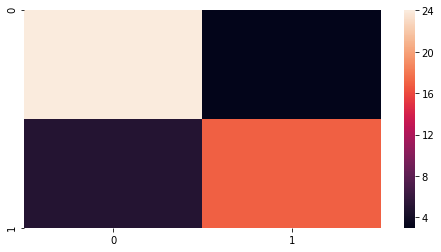

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
Y_pred = logreg.predict(X_test)
print(classification_report(y_test,Y_pred))
plt.tight_layout()
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,Y_pred))
report_dict['logreg'].append((round(accuracy_score(y_test,Y_pred),3),round(precision_score(y_test,Y_pred),3),
round(recall_score(y_test,Y_pred),3),round(f1_score(y_test,Y_pred),3)))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.73      0.86      0.79        22

    accuracy                           0.80        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.81      0.80      0.80        49



<Figure size 432x288 with 0 Axes>

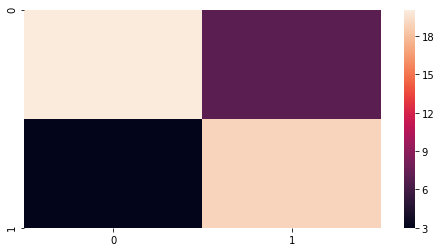

In [15]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
Y_pred = gnb.predict(X_test)
print(classification_report(y_test,Y_pred))
plt.tight_layout()
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,Y_pred))
report_dict['gnb'].append((round(accuracy_score(y_test,Y_pred),3),round(precision_score(y_test,Y_pred),3),
round(recall_score(y_test,Y_pred),3),round(f1_score(y_test,Y_pred),3)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.77      0.77      0.77        22

    accuracy                           0.80        49
   macro avg       0.79      0.79      0.79        49
weighted avg       0.80      0.80      0.80        49



<Figure size 432x288 with 0 Axes>

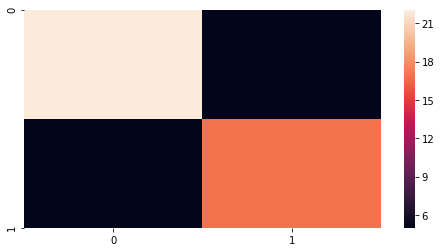

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
Y_pred = dt.predict(X_test)
print(classification_report(y_test,Y_pred))
plt.tight_layout()
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,Y_pred))
report_dict['dt'].append((round(accuracy_score(y_test,Y_pred),3),round(precision_score(y_test,Y_pred),3),
round(recall_score(y_test,Y_pred),3),round(f1_score(y_test,Y_pred),3)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.95      0.86      0.90        22

    accuracy                           0.92        49
   macro avg       0.92      0.91      0.92        49
weighted avg       0.92      0.92      0.92        49



<Figure size 432x288 with 0 Axes>

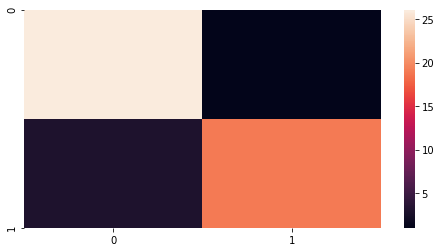

In [17]:
lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
Y_pred = lsvc.predict(X_test)
print(classification_report(y_test,Y_pred))
plt.tight_layout()
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,Y_pred))
report_dict['lsvc'].append((round(accuracy_score(y_test,Y_pred),3),round(precision_score(y_test,Y_pred),3),
round(recall_score(y_test,Y_pred),3),round(f1_score(y_test,Y_pred),3)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.81      0.77      0.79        22

    accuracy                           0.82        49
   macro avg       0.82      0.81      0.81        49
weighted avg       0.82      0.82      0.82        49



<Figure size 432x288 with 0 Axes>

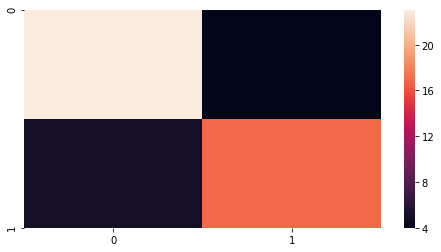

In [18]:
svm = SVC()
svm.fit(X_train,y_train)
Y_pred = svm.predict(X_test)
print(classification_report(y_test,Y_pred))
plt.tight_layout()
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,Y_pred))
report_dict['svm'].append((round(accuracy_score(y_test,Y_pred),3),round(precision_score(y_test,Y_pred),3),
round(recall_score(y_test,Y_pred),3),round(f1_score(y_test,Y_pred),3)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89        27
           1       1.00      0.68      0.81        22

    accuracy                           0.86        49
   macro avg       0.90      0.84      0.85        49
weighted avg       0.89      0.86      0.85        49



<Figure size 432x288 with 0 Axes>

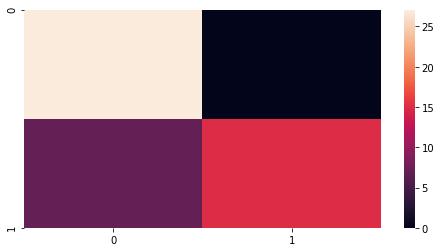

In [19]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
Y_pred = sgd.predict(X_test)
print(classification_report(y_test,Y_pred))
plt.tight_layout()
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,Y_pred))
report_dict['sgd'].append((round(accuracy_score(y_test,Y_pred),3),round(precision_score(y_test,Y_pred),3),
round(recall_score(y_test,Y_pred),3),round(f1_score(y_test,Y_pred),3)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        27
           1       1.00      0.82      0.90        22

    accuracy                           0.92        49
   macro avg       0.94      0.91      0.92        49
weighted avg       0.93      0.92      0.92        49



<Figure size 432x288 with 0 Axes>

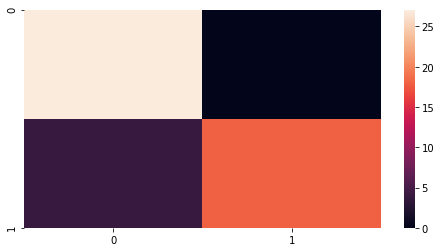

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
Y_pred = knn.predict(X_test)
print(classification_report(y_test,Y_pred))
plt.tight_layout()
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,Y_pred))
report_dict['knn'].append((round(accuracy_score(y_test,Y_pred),3),round(precision_score(y_test,Y_pred),3),
round(recall_score(y_test,Y_pred),3),round(f1_score(y_test,Y_pred),3)))

In [21]:
print('accuracy, precision, recall, f1')

accuracy, precision, recall, f1


In [22]:
pd.DataFrame(report_dict)

,rf,dt,xgb,sgd,logreg,lsvc,svm,gnb,knn
0,"(0.898, 1.0, 0.773, 0.872)","(0.796, 0.773, 0.773, 0.773)","(0.878, 0.9, 0.818, 0.857)","(0.857, 1.0, 0.682, 0.811)","(0.837, 0.85, 0.773, 0.81)","(0.918, 0.95, 0.864, 0.905)","(0.816, 0.81, 0.773, 0.791)","(0.796, 0.731, 0.864, 0.792)","(0.918, 1.0, 0.818, 0.9)"
